[temp] link for exploration: https://colab.research.google.com/drive/1S0APhlzk7flsTJ5j7VCTrFxDMk1LekLS#scrollTo=YTydnHchkXTT

# In this notebook: 


* features cleaning 
* features selection (to visualize) by: 
  * variance 
  * correlation
* features scaling??? -> https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec
* features visualization
  * bar charts, x: feature (sz / rel), y: average value - maybe interactive?
  * PCA 
  * t-SNE
  * one feature as function of another 




## Load data

In [1]:
from google.colab import files, drive
import glob, os
import pandas as pd

In [2]:
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/eeg_data_science/Results/4.Features/data.csv"
features_df = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Clean dataframe

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# remove metadata 
columns_to_drop = ['idx', 'file_name', 'task', 'meta_data', 'spect_data', 'conn_data', 'date']
features_df = features_df.drop(columns=columns_to_drop)

In [5]:
# move diagnosis and sub_num to a different df 
tag_columns = ['sub_num','diagnosis']
y = features_df[tag_columns]
X = features_df.drop(columns='diagnosis') #tag_columns[1:] #data without tags

data_path = "/content/drive/MyDrive/eeg_data_science/Results/5.For_Modeling/"


X.to_csv(data_path + 'X.csv')
y.to_csv(data_path + 'y.csv')

## Chose features to visualize

In [ ]:
X

,idx,sub_num,abs_power_chan1_delta,abs_power_chan1_theta,abs_power_chan1_alpha,abs_power_chan1_beta,abs_power_chan1_gamma,abs_power_chan2_delta,abs_power_chan2_theta,abs_power_chan2_alpha,abs_power_chan2_beta,abs_power_chan2_gamma,abs_power_chan3_delta,abs_power_chan3_theta,abs_power_chan3_alpha,abs_power_chan3_beta,abs_power_chan3_gamma,abs_power_chan4_delta,abs_power_chan4_theta,abs_power_chan4_alpha,abs_power_chan4_beta,abs_power_chan4_gamma,abs_power_chan5_delta,abs_power_chan5_theta,abs_power_chan5_alpha,abs_power_chan5_beta,abs_power_chan5_gamma,abs_power_chan6_delta,abs_power_chan6_theta,abs_power_chan6_alpha,abs_power_chan6_beta,abs_power_chan6_gamma,abs_power_chan7_delta,abs_power_chan7_theta,abs_power_chan7_alpha,abs_power_chan7_beta,abs_power_chan7_gamma,abs_power_chan8_delta,abs_power_chan8_theta,abs_power_chan8_alpha,...,abs_power_chan60_gamma,abs_power_chan61_delta,abs_power_chan61_theta,abs_power_chan61_alpha,abs_power_chan61_beta,abs_power_chan61_gamma,abs_power_chan62_delta,abs_power_chan62_theta,abs_power_chan62_alpha,abs_power_chan62_beta,abs_power_chan62_gamma,abs_power_broadband_delta,abs_power_broadband_theta,abs_power_broadband_alpha,abs_power_broadband_beta,abs_power_broadband_gamma,degree_delta,clustcoef_delta,char_path_delta,sw_delta,degree_theta,clustcoef_theta,char_path_theta,sw_theta,degree_alpha,clustcoef_alpha,char_path_alpha,sw_alpha,degree_beta,clustcoef_beta,char_path_beta,sw_beta,degree_gamma,clustcoef_gamma,char_path_gamma,sw_gamma,degree_broadband,clustcoef_broadband,char_path_broadband,sw_broadband
0,1,55,2.997628,2.866980,1.439212,0.478617,0.015081,2.350409,2.535994,1.306829,0.438890,0.015407,2.178444,1.574173,1.207902,0.489732,0.012961,2.536794,3.796851,1.450371,0.580213,0.011790,2.186850,2.238247,1.384868,0.734377,0.016053,5.211019,2.129900,1.506242,0.609327,0.014294,3.541078,2.252265,1.468962,0.764281,0.012380,2.887406,3.127428,1.504914,...,0.018956,1.736672,1.732838,1.514800,0.389188,0.012788,1.892865,1.475155,0.800901,0.258841,0.006356,0.605277,1.048905,0.662006,0.515970,1.904266,2.451613,0.359677,7.014245,4.905887,2.451613,0.401075,3.063091,12.175164,2.451613,0.315054,5.270553,7.942733,2.451613,0.321505,3.241192,11.971291,2.451613,0.384409,3.406433,7.998436,2.451613,0.333333,5.166372,6.309322
1,2,55,2.997628,2.866980,1.439212,0.478617,0.015081,2.350409,2.535994,1.306829,0.438890,0.015407,2.178444,1.574173,1.207902,0.489732,0.012961,2.536794,3.796851,1.450371,0.580213,0.011790,2.186850,2.238247,1.384868,0.734377,0.016053,5.211019,2.129900,1.506242,0.609327,0.014294,3.541078,2.252265,1.468962,0.764281,0.012380,2.887406,3.127428,1.504914,...,0.018956,1.736672,1.732838,1.514800,0.389188,0.012788,1.892865,1.475155,0.800901,0.258841,0.006356,0.605277,1.048905,0.662006,0.515970,1.904266,2.451613,0.359677,7.014245,6.454468,2.451613,0.401075,3.063091,12.155775,2.451613,0.315054,5.270553,10.689792,2.451613,0.321505,3.241192,16.100635,2.451613,0.384409,3.406433,7.892570,2.451613,0.333333,5.166372,4.709836
2,3,55,2.304277,1.464697,1.021489,0.473501,0.022478,2.620366,1.542551,1.065711,0.483346,0.019318,3.015716,1.260995,1.138054,0.726448,0.051935,2.341289,2.270750,1.150902,0.583438,0.015714,2.508057,1.586908,1.220244,0.861676,0.029839,2.206220,1.002892,0.919134,0.762823,0.062984,2.183242,1.181697,1.029725,0.769041,0.034288,2.429340,1.888360,1.167454,...,0.017013,1.778654,1.139310,1.013299,0.426817,0.015515,1.829952,1.100819,0.718306,0.378114,0.015672,0.679280,0.629987,0.594717,0.358081,1.495626,2.451613,0.382488,3.031169,10.868893,2.451613,0.294624,3.417989,8.381876,2.451613,0.366129,2.753894,13.612325,2.451613,0.356989,3.332317,14.710573,2.451613,0.344624,4.562914,9.356731,2.451613,0.380108,3.436314,10.745283
3,4,92,1.358091,0.700644,4.319874,0.227357,0.010910,1.694797,0.776140,4.736051,0.260053,0.013562,1.594622,0.768071,4.656272,0.269104,0.012991,1.359649,0.701525,4.313224,0.228198,0.011000,1.326586,0.785807,4.056232,0.248524,0.009002,0.581745,0.376087,2.948890,0.136710,0.005345,0.582605,0.38

In [ ]:
broad_data = [col for col in features_df.columns[2:] if 'broad' in col]
broad_data

['abs_power_broadband_delta',
 'abs_power_broadband_theta',
 'abs_power_broadband_alpha',
 'abs_power_broadband_beta',
 'abs_power_broadband_gamma',
 'degree_broadband',
 'clustcoef_broadband',
 'char_path_broadband',
 'sw_broadband']

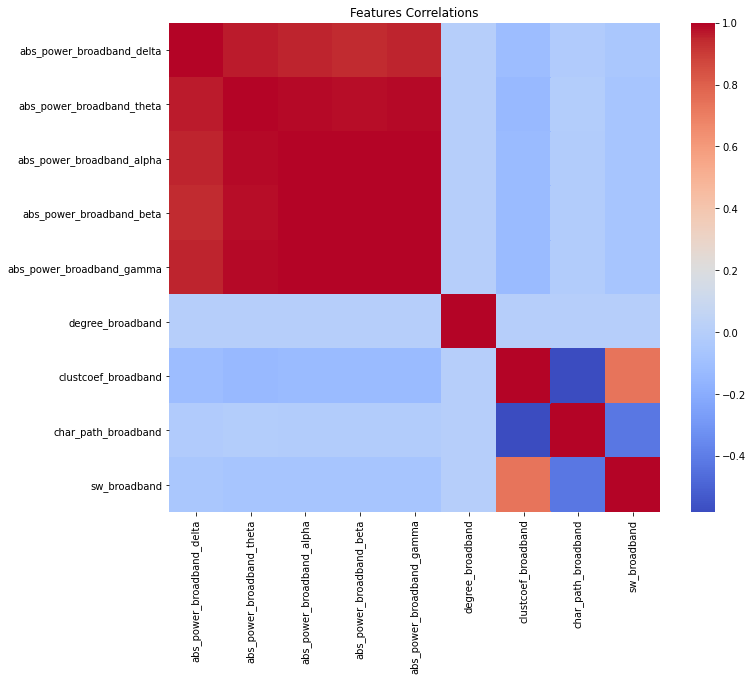

In [ ]:
vis_correlation_df = features_df[broad_data].corr()
plt.subplots(figsize=(11,9))
sns.heatmap(vis_correlation_df, cmap='coolwarm')
plt.title('Features Correlations')
plt.show()

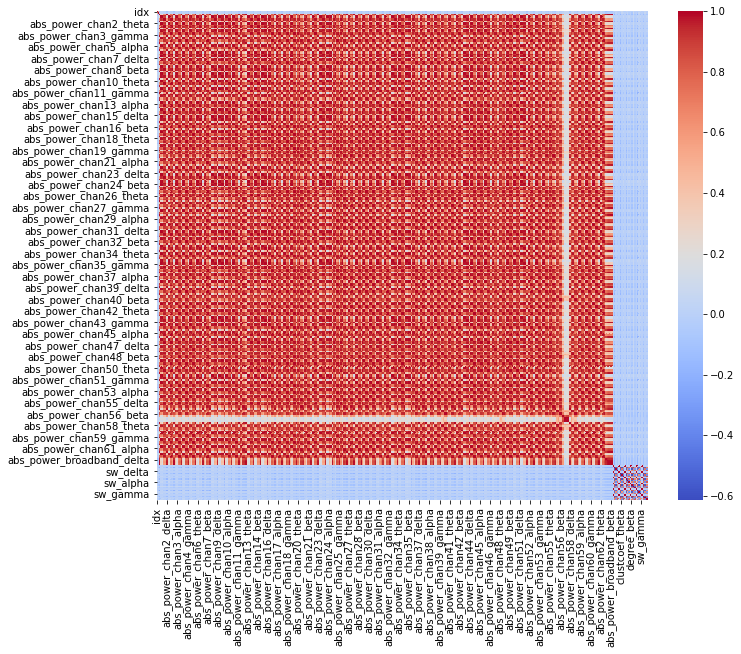

In [ ]:
correlation_df = features_df.corr()
plt.subplots(figsize=(11,9))
sns.heatmap(correlation_df, cmap='coolwarm')
plt.show()

In [ ]:
correlation_df.values[[np.arange(correlation_df.shape[0])]*2] = 0
TH = 0.9
correlation_df_th = (correlation_df > TH) | (correlation_df < -TH)
num_high_corr = sum(int(correlation_df_th[correlation_df_th==True])) / 2
num_high_corr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


TypeError: ignored

In [ ]:
correlation_df_th==True

,idx,sub_num,abs_power_chan1_delta,abs_power_chan1_theta,abs_power_chan1_alpha,abs_power_chan1_beta,abs_power_chan1_gamma,abs_power_chan2_delta,abs_power_chan2_theta,abs_power_chan2_alpha,abs_power_chan2_beta,abs_power_chan2_gamma,abs_power_chan3_delta,abs_power_chan3_theta,abs_power_chan3_alpha,abs_power_chan3_beta,abs_power_chan3_gamma,abs_power_chan4_delta,abs_power_chan4_theta,abs_power_chan4_alpha,abs_power_chan4_beta,abs_power_chan4_gamma,abs_power_chan5_delta,abs_power_chan5_theta,abs_power_chan5_alpha,abs_power_chan5_beta,abs_power_chan5_gamma,abs_power_chan6_delta,abs_power_chan6_theta,abs_power_chan6_alpha,abs_power_chan6_beta,abs_power_chan6_gamma,abs_power_chan7_delta,abs_power_chan7_theta,abs_power_chan7_alpha,abs_power_chan7_beta,abs_power_chan7_gamma,abs_power_chan8_delta,abs_power_chan8_theta,abs_power_chan8_alpha,...,abs_power_chan60_gamma,abs_power_chan61_delta,abs_power_chan61_theta,abs_power_chan61_alpha,abs_power_chan61_beta,abs_power_chan61_gamma,abs_power_chan62_delta,abs_power_chan62_theta,abs_power_chan62_alpha,abs_power_chan62_beta,abs_power_chan62_gamma,abs_power_broadband_delta,abs_power_broadband_theta,abs_power_broadband_alpha,abs_power_broadband_beta,abs_power_broadband_gamma,degree_delta,clustcoef_delta,char_path_delta,sw_delta,degree_theta,clustcoef_theta,char_path_theta,sw_theta,degree_alpha,clustcoef_alpha,char_path_alpha,sw_alpha,degree_beta,clustcoef_beta,char_path_beta,sw_beta,degree_gamma,clustcoef_gamma,char_path_gamma,sw_gamma,degree_broadband,clustcoef_broadband,char_path_broadband,sw_broadband
idx,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sub_num,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
abs_power_chan1_delta,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
abs_power_chan1_theta,False,False,False,False,True,True,True,False,True,True,False,True,False,True,True,False,False,False,True,True,False,False,False,True,True,False,False,False,True,True,True,True,False,True,True,False,False,False,True,True,...,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
abs_power_chan1_alpha,False,False,False,True,False,False,False,False,True,True,False,True,False,True,True,False,False,False,True,True,False,False,False,True,True,False,False,False,True,True,False,True,False,True,True,False,False,False,True,True,...,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [ ]:
341*341

116281

In [ ]:
a = correlation_df_th.where(correlation_df_th==True).dropna(how='all').dropna(axis=1)

a.index[1]
#a.columns

IndexError: ignored

In [ ]:
df.columns

Index(['idx', 'sub_num', 'abs_power_chan1_delta', 'abs_power_chan1_theta',
       'abs_power_chan1_alpha', 'abs_power_chan1_beta',
       'abs_power_chan1_gamma', 'abs_power_chan2_delta',
       'abs_power_chan2_theta', 'abs_power_chan2_alpha',
       ...
       'sw_beta', 'degree_gamma', 'clustcoef_gamma', 'char_path_gamma',
       'sw_gamma', 'degree_broadband', 'clustcoef_broadband',
       'char_path_broadband', 'sw_broadband', 'diagnosis'],
      dtype='object', length=342)

In [ ]:
# pca https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60 

# Standardizing the features
x = StandardScaler().fit_transform(x)

# pca 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)


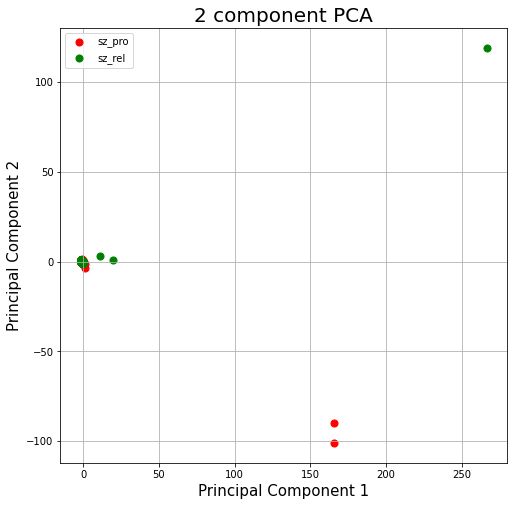

In [ ]:
# Visualize 2D Projection

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['sz_pro', 'sz_rel']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
finalDf['diagnosis']

0      sz_pro
1      sz_pro
2      sz_pro
3      sz_pro
4      sz_pro
        ...  
515    sz_rel
516    sz_rel
517    sz_rel
518    sz_rel
519    sz_rel
Name: diagnosis, Length: 520, dtype: object

In [ ]:
# feature selection
'''
1. look for correlations between features (TH= 0.5) find 0.9 
2. variance - if is very little compared to mean
3. inside a classification model automatic feature selections 
4. see which features are important with SHAP
how many features to leave? less then 100 

https://www.datacamp.com/community/tutorials/feature-selection-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585186&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1008002&gclid=CjwKCAjwqvyFBhB7EiwAER786XGjif4x0BheNUuX3mOU_G1uuBQA7pexT8kwhnE__T4_7Nt1bkyK4xoCuLIQAvD_BwE
'''

In [ ]:
df.describe()

,idx,sub_num,abs_power_chan1_delta,abs_power_chan1_theta,abs_power_chan1_alpha,abs_power_chan1_beta,abs_power_chan1_gamma,abs_power_chan2_delta,abs_power_chan2_theta,abs_power_chan2_alpha,abs_power_chan2_beta,abs_power_chan2_gamma,abs_power_chan3_delta,abs_power_chan3_theta,abs_power_chan3_alpha,abs_power_chan3_beta,abs_power_chan3_gamma,abs_power_chan4_delta,abs_power_chan4_theta,abs_power_chan4_alpha,abs_power_chan4_beta,abs_power_chan4_gamma,abs_power_chan5_delta,abs_power_chan5_theta,abs_power_chan5_alpha,abs_power_chan5_beta,abs_power_chan5_gamma,abs_power_chan6_delta,abs_power_chan6_theta,abs_power_chan6_alpha,abs_power_chan6_beta,abs_power_chan6_gamma,abs_power_chan7_delta,abs_power_chan7_theta,abs_power_chan7_alpha,abs_power_chan7_beta,abs_power_chan7_gamma,abs_power_chan8_delta,abs_power_chan8_theta,abs_power_chan8_alpha,...,abs_power_chan60_gamma,abs_power_chan61_delta,abs_power_chan61_theta,abs_power_chan61_alpha,abs_power_chan61_beta,abs_power_chan61_gamma,abs_power_chan62_delta,abs_power_chan62_theta,abs_power_chan62_alpha,abs_power_chan62_beta,abs_power_chan62_gamma,abs_power_broadband_delta,abs_power_broadband_theta,abs_power_broadband_alpha,abs_power_broadband_beta,abs_power_broadband_gamma,degree_delta,clustcoef_delta,char_path_delta,sw_delta,degree_theta,clustcoef_theta,char_path_theta,sw_theta,degree_alpha,clustcoef_alpha,char_path_alpha,sw_alpha,degree_beta,clustcoef_beta,char_path_beta,sw_beta,degree_gamma,clustcoef_gamma,char_path_gamma,sw_gamma,degree_broadband,clustcoef_broadband,char_path_broadband,sw_broadband
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,...,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,5.200000e+02,520.000000,520.000000,520.000000,5.200000e+02,520.000000,520.000000,520.000000,5.200000e+02,520.000000,520.000000,520.000000,5.200000e+02,520.000000,520.000000,520.000000,5.200000e+02,520.000000,520.000000,520.000000,5.200000e+02,520.000000,520.000000,520.000000
mean,260.986538,3928.998077,5.847490,9.243836,12.872389,3.316877,0.625389,5.187411,8.842859,12.891100,3.606024,0.724184,5.702460,6.444368,10.250960,2.786885,0.492407,4.678773,8.252859,11.617154,3.177459,0.525523,4.807993,5.923385,9.314445,2.516321,0.438997,5.226701,9.316250,22.618154,4.292546,1.039244,4.757526,5.591674,8.096790,2.414051,0.447931,4.200679,12.687772,19.365332,...,0.393592,3.987216,6.967775,10.362562,3.026086,0.469567,5.215699,7.505604,11.706743,2.813050,0.429830,1.178276,1.026192,0.930661,0.750546,2.694511,2.451613e+00,0.330802,3.160057,7.851171,2.451613e+00,0.330183,3.271341,8.145888,2.451613e+00,0.328789,2.965687,7.638526,2.451613e+00,0.320569,3.303298,7.741640,2.451613e+00,0.322911,3.148978,7.362540,2.451613e+00,0.327367,3.073149,7.996847
std,150.688663,2712.645372,37.424840,123.484451,188.859658,38.352539,7.767224,27.781929,118.417973,187.025944,41.632637,9.556746,36.060207,61.218542,119.613283,28.489594,5.371100,27.410122,100.109502,158.683651,35.126427,6.204486,30.076516,57.184791,112.615786,27.017356,5.161105,27.632543,131.389473,416.694634,52.101813,15.553593,34.553597,54.050438,91.338176,24.804736,5.028200,26.211288,198.975628,336.882205,...,4.496262,25.984966,84.965074,128.978173,33.835060,5.612772,42.127580,90.561978,144.840659,30.895666,5.014382,5.032469,4.564204,6.193426,5.370612,16.052230,1.778067e-15,0.088812,1.547706,5.463019,1.778067e-15,0.090376,1.787006,5.829424,1.778067e-15,0.091868,1.540996,5.102876,1.778067e-15,0.089891,1.737983,4.936370,1.778067e-15,0.085100,1.590553,4.5818